<a href="https://colab.research.google.com/github/YirenShen-07/590Assignment/blob/main/%E2%80%9CYiren590second_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### link to the location in github repository:
# AIPI 590 - XAI | Assignment #2-Second Adversarial Patch
### I created three adversarial patches, and this file contains the Second adversarial patch. I used image from internet and create a patch. The other two files can be found in the files on the left
### Yiren Shen

In [4]:
import urllib
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s]


Epoch 0, Loss: 30.770347595214844
Epoch 10, Loss: 21.073802947998047
Epoch 20, Loss: 16.409732818603516
Epoch 30, Loss: 14.22562026977539
Epoch 40, Loss: 12.469305038452148
Epoch 50, Loss: 11.20678997039795
Epoch 60, Loss: 10.135708808898926
Epoch 70, Loss: 9.016207695007324
Epoch 80, Loss: 7.798664569854736
Epoch 90, Loss: 6.612859725952148


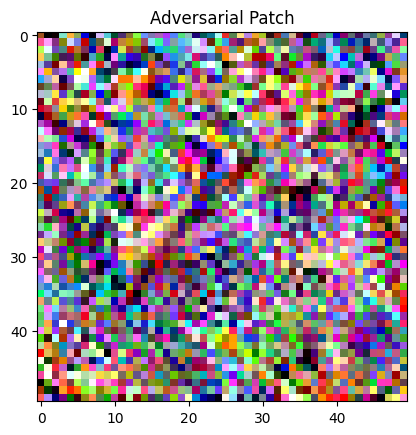

In [6]:
# Define Image Converter
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# dowload image and open image
url = 'https://m.media-amazon.com/images/I/61IkrxQ9p8L._AC_SL1500_.jpg'  # 替换为实际图片网址
image_path = 'downloaded_image.jpg'
urllib.request.urlretrieve(url, image_path)
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)

# make model
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

image_path = 'downloaded_image.jpg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)

# make adversarial patch
patch_size = (50, 50)
adversarial_patch = torch.rand((3, *patch_size), requires_grad=True)
optimizer = optim.Adam([adversarial_patch], lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()
target_class = torch.tensor([5])

# train model
num_epochs = 100
for epoch in range(num_epochs):
    patched_image = image_tensor.clone()
    patched_image[:, :, :patch_size[0], :patch_size[1]] = adversarial_patch
    output = model(patched_image)
    loss = loss_fn(output, target_class)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# show
plt.imshow(adversarial_patch.detach().permute(1, 2, 0).numpy())
plt.title('Adversarial Patch')
plt.show()


# Reference

Tutorial 10 Adversarial attacks: https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial10/Adversarial_Attacks.ipynb#scrollTo=JwbxjCgY9FWJ

Chatgpt modification of Python code for generating adversarial patches.